<a href="https://colab.research.google.com/github/DaffaFathir/Machine-Learning-Task/blob/main/Tugas%2012/CNN_GoogleNet_Daffa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Nama    : Daffa Fathir Fajri
# NIM     : 1103213149
# Kelas   : TK-45-04
# Lecture : 12
# Model   : CNN (GoogleNet)
# Dataset : Fashion MNIST

chatGPT promph : https://chatgpt.com/share/19b146d0-c916-498c-96fa-844153d4128a

**Pertama, kita perlu mengimpor semua pustaka yang diperlukan.**

In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Flatten, Dense, AveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive


**Hubungkan Google Drive agar kita bisa mengakses dataset.**

In [56]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Baca file train.csv dan test.csv dari Google Drive.**

In [57]:
# Path to your dataset files
train_path = '/content/drive/MyDrive/Machine Learning/Fashion/fashion-mnist_train.csv'
test_path = '/content/drive/MyDrive/Machine Learning/Fashion/fashion-mnist_test.csv'

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

**Pisahkan fitur dan label, normalisasi data, dan ubah label menjadi one-hot encoding.**

In [58]:
# Split features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to match the input shape of the CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Definisikan arsitektur model GoogleNet (Inception v1)**

In [59]:
def inception_module(x, filters):
    conv1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)
    conv5x5 = Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)
    max_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    max_pool_conv = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(max_pool)
    output = concatenate([conv1x1, conv3x3, conv5x5, max_pool_conv], axis=-1)
    return output

input_layer = Input(shape=(28, 28, 1))
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [64, 128, 32, 32])
x = inception_module(x, [128, 192, 96, 64])
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [192, 208, 48, 64])
x = inception_module(x, [160, 224, 64, 64])
x = inception_module(x, [128, 256, 64, 64])
x = inception_module(x, [112, 288, 64, 64])
x = inception_module(x, [256, 320, 128, 128])

# Reduce the size of the input to fit AveragePooling2D
x = Conv2D(832, (1, 1), padding='same', activation='relu')(x)
x = AveragePooling2D((4, 4))(x)  # Reduce pooling size to 4x4

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(input_layer, output_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_74 (Conv2D)          (None, 14, 14, 64)           3200      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_29 (MaxPooli  (None, 7, 7, 64)             0         ['conv2d_74[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 max_pooling2d_30 (MaxPooli  (None, 7, 7, 64)             0         ['max_pooling2d_29[0][0]']

**Mengatur parameter untuk training.**

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Melatih model dengan data yang sudah disiapkan.**

In [61]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 51s 47ms/step - loss: 0.9660 - accuracy: 0.6043 - val_loss: 0.5343 - val_accuracy: 0.7979
Epoch 2/20
750/750 [==============================] - 32s 43ms/step - loss: 0.4379 - accuracy: 0.8410 - val_loss: 0.3795 - val_accuracy: 0.8652
Epoch 3/20
750/750 [==============================] - 32s 42ms/step - loss: 0.3497 - accuracy: 0.8754 - val_loss: 0.3670 - val_accuracy: 0.8652
Epoch 4/20
750/750 [==============================] - 32s 42ms/step - loss: 0.3106 - accuracy: 0.8901 - val_loss: 0.3146 - val_accuracy: 0.8928
Epoch 5/20
750/750 [==============================] - 32s 42ms/step - loss: 0.2882 - accuracy: 0.8980 - val_loss: 0.3060 - val_accuracy: 0.8912
Epoch 6/20
750/750 [==============================] - 32s 43ms/step - loss: 0.2628 - accuracy: 0.9045 - val_loss: 0.2761 - val_accuracy: 0.9043
Epoch 7/20
750/750 [==============================] - 32s 42ms/step - loss: 0.2510 - accuracy: 0.9101 - val_loss: 0.2804 - val_accuracy:

**Mengevaluasi model dengan data uji.**

In [62]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


313/313 [==============================] - 5s 14ms/step - loss: 0.3631 - accuracy: 0.9193
Test Loss: 0.36310797929763794
Test Accuracy: 0.9193000197410583


**Visualisasi kinerja model selama training.**

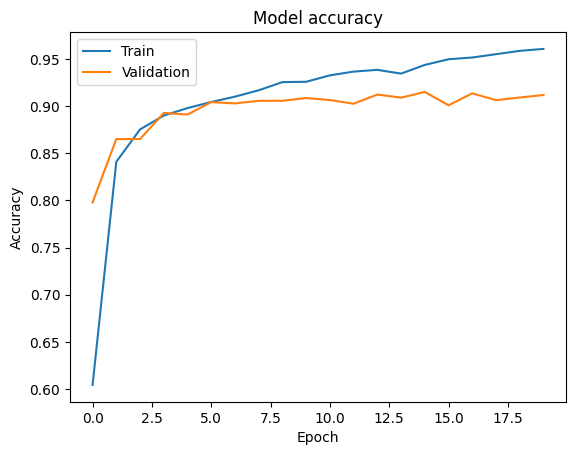

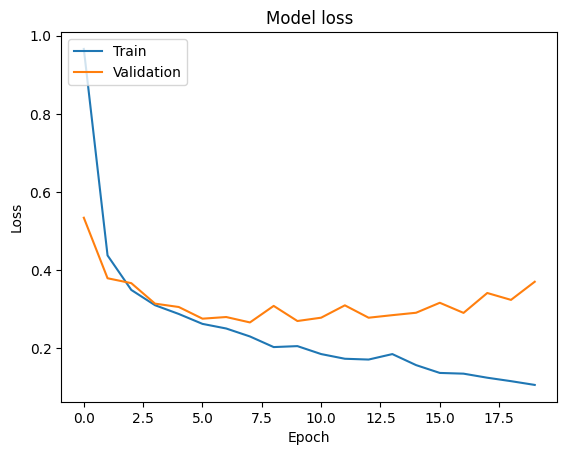

In [63]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
